# Tests for the Forest.py burte force methods

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('../forestpy/forestpy'))

import forest
from importlib import reload
reload(forest)
import os
from pandas import read_csv
import numpy as np

from datetime import datetime, timedelta

from multigrids import TemporalMultiGrid, TemporalGrid
import random_forest_tools as tools
reload(tools)
import matplotlib.pyplot as plt

data_dir = "/Users/rwspicer/Desktop/data/V1/"
feature_file = os.path.join(
    data_dir,
    "master-project/training/ACP/v1/temporal-multigrid/rf_traing_set_v1.yml"
)
label_file = os.path.join(
    data_dir,
    "thermokarst/initiation-regions/ACP/v3-1/PDM-5var/without_predisp/temporal-grid/ia_grid_5var.yml"
)

In [2]:
ss_data_sets = forest.setup_brute_force(feature_file, label_file)

Loading data.
Creating 25% subsample.


KeyboardInterrupt: 

In [11]:
forest.run_brute_force('mac', 'test_list.csv', ss_data_sets)




--------------------------------------------------------------------------------
Git check-in
rfm_e4_md12_mfAUTO_mln100_msl1_mss2_tdp25.yml
Generating random forest for  rfm_e4_md12_mfAUTO_mln100_msl1_mss2_tdp25.yml.


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 4building tree 2 of 4
building tree 3 of 4
building tree 4 of 4



[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.7min finished


Testing random forest for  rfm_e4_md12_mfAUTO_mln100_msl1_mss2_tdp25.yml.
generating predictions


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.2s finished


Evaluating predictions



--------------------------------------------------------------------------------
Git check-in
rfm_e4_md12_mfAUTO_mln100_msl1_mss2_tdp50.yml
Generating random forest for  rfm_e4_md12_mfAUTO_mln100_msl1_mss2_tdp50.yml.


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 4building tree 2 of 4building tree 3 of 4

building tree 4 of 4



[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  3.4min finished


Testing random forest for  rfm_e4_md12_mfAUTO_mln100_msl1_mss2_tdp50.yml.
generating predictions


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.3s finished


Evaluating predictions



--------------------------------------------------------------------------------
Git check-in
rfm_e4_md12_mfAUTO_mln100_msl1_mss2_tdp75.yml
Generating random forest for  rfm_e4_md12_mfAUTO_mln100_msl1_mss2_tdp75.yml.


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 4building tree 2 of 4
building tree 3 of 4
building tree 4 of 4



[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  5.4min finished


Testing random forest for  rfm_e4_md12_mfAUTO_mln100_msl1_mss2_tdp75.yml.
generating predictions


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.4s finished


Evaluating predictions



--------------------------------------------------------------------------------
Git check-in
All current runs completed sleeping for 1 hour.


KeyboardInterrupt: 

In [13]:
settings = forest.RFParams('rfm_e4_md12_mfAUTO_mln100_msl1_mss2_tdp25.yml')
model = forest.create_model(ss_data_sets['tdp25']['features'], ss_data_sets['tdp25']['labels'], settings,2,4)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 4building tree 2 of 4building tree 3 of 4

building tree 4 of 4



[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.6min finished


In [24]:
training_data = TemporalMultiGrid(feature_file)
om = TemporalGrid(label_file)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


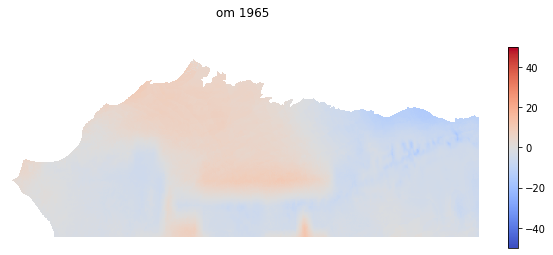

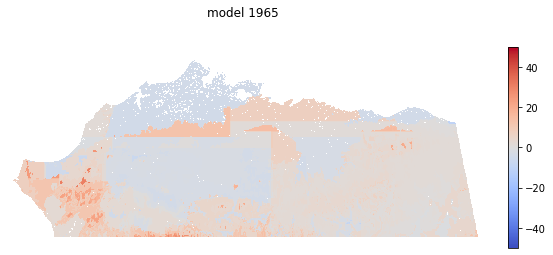

1965 -2.2765215388935616 52.43233687925893


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


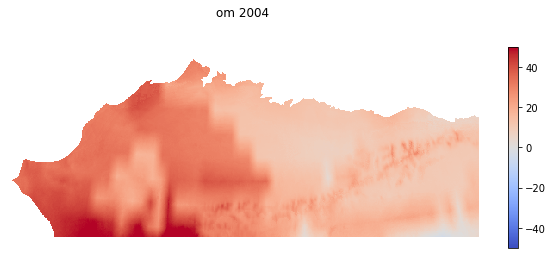

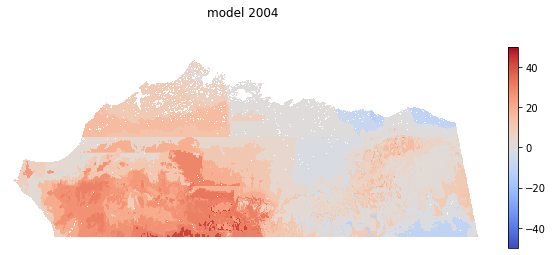

2004 12.975374841814913 66.7839487839285


In [45]:
new = tools.apply_model_to_year(model, training_data, 1965, training_data.config['mask'])
tools.quick_coolwarm(om[1965] , 'om 1965')
tools.quick_coolwarm(new , 'model 1965')

diff = om[1965] - new
print(1965, np.nanmean(diff), np.nanvar(diff))

new = tools.apply_model_to_year(model, training_data, 2005, training_data.config['mask'])
tools.quick_coolwarm(om[2004] , 'om 2004')
tools.quick_coolwarm(new , 'model 2004')

diff = om[2004] - new
print(2004, np.nanmean(diff), np.nanvar(diff))

# model.predict(ss_data_sets['full']['features'])



In [55]:
new = model.predict(ss_data_sets['full']['features'].T)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.4s finished


In [60]:
diff = ss_data_sets['full']['labels'] - new

np.abs(diff).mean()

6.19007827923771

In [51]:
means= []

for y in range(1902,2015):
    new = tools.apply_model_to_year(model, training_data, 1965, training_data.config['mask'])
    diff = om[y] - new
    means.append(np.nanmean(diff))
    

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


In [54]:
means
np.mean(np.abs(means))

8.297835950073448

In [67]:
ev = forest.evaluate_model(model, ss_data_sets['full']['features'], ss_data_sets['full']['labels'])
ev

generating predictions


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.4s finished


Evaluating predictions


{'prediction diff': array([-2.32236832, -2.32260531, -2.32260531, ..., -4.50861837,
        -4.51481153, -4.51521351]),
 'predict time': '0:00:02.966195',
 'diff mean': 0.0021020998026813984,
 'diff var': 27.843348450259484,
 'abs diff mean': 6.19007827923771,
 'mode': '',
 'median': 0.4571196510098443}

(array([1.8659898e+07, 9.9736710e+06, 3.7702990e+06, 1.3221410e+06,
        4.2956100e+05, 1.1376800e+05, 3.2519000e+04, 7.8980000e+03,
        1.6640000e+03, 7.5700000e+02]),
 array([2.22911399e-07, 5.38868101e+00, 1.07773618e+01, 1.61660426e+01,
        2.15547234e+01, 2.69434042e+01, 3.23320850e+01, 3.77207658e+01,
        4.31094466e+01, 4.84981273e+01, 5.38868081e+01]),
 <a list of 10 Patch objects>)

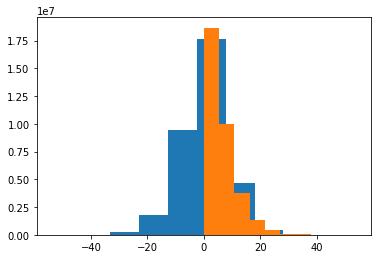

In [69]:
plt.hist(ev['prediction diff'])
plt.hist(np.abs(ev['prediction diff']))

In [110]:
import pickle
pickle.dump(ss_data_sets, open('ss_data.pkl', 'wb'))